[![Le Baladin](https://img.shields.io/badge/Le_baladin-Nova_2021_CAS_/_v1405_Cas-blue.svg)](https://sites.google.com/view/astronomie-ut1/accueil)

_Dominique Touzan_<sup>1,2</sup>

<sup>1</sup>Notebook: https://github.com/dtouzan/Jupyter/blob/master/Nova_2021_CAS.ipynb

<sup>2</sup>Correspondance: [dtouzan@gmail.com](mailto:dtouzan@gmail.com).

Édition   1.0, révision 01/12/2021 - 01/02/2022.

---
**Résumé** : Durant l'année 2021 une étoile dans la constellation de Cassiopée augmenta en luminosité pour devenir une Nova, celle ci fut découverte par Yuji Nakamura au Japon. L'observatoire était opérationnel et cette étoile est circumpolaire. Le suivi de cette Nova était donc possible sur une longue période avec aussi de petits instruments et ensuite courant de l'année commencer la spectroscopie avec le Star Analyser 200. Cette étoile dont la magnitude oscillait entre 5 au début et 10 vers la fin du suivi avait des périodes de fluctuation assez fréquente. Les premières images obtenues avec les téléobjectifs et les caméras cmos ou ccd me confortaire à réinstaller le télescope de 150 milimètre de diamètre et 1,50 mètre de focale pour détailler la zone de cette étoile, bon nombre d'image a été réalisé avec les deux appareils en fonction et vers l'automne la spectrocopie pû commencé.

**Observations** : Les observations sont réalisées avec les instruments Intes M603, La camera Atik 383L+ et le porte filtre Atik EFW, le filtre Atik Astonomik "Clear". L'objectif Canon 200mm F2.8 ou le Samyang 85mm 1.4, la camera ZWO ASI 178MM et le porte filtre EFWMini et un filtre "Clear" ou le réseau Star Analyser SA200. Les observations commençaient en début de soirée au printemps ou milieu de soirée en été et se terminaient souvent en fin de soirée vers minuit une heure du matin et si possible sans vent. La Lune était présente sur certaines observations mais ne génait pas l'observation sauf dans le cas des prises de vue avec le spectrographe, l'ayant reçu en fin d'année 2021 les images prisent avec sont peu nombreuses et certaines sont avec une Lune gibbeuse cependant pour un commencement en spectroscopie les résultats sont encourageant. Le temps de pose pour les images avec le filtre clear aussi bien avec la caméra Atik 383L+ qu'avec la ZWO ASI 178MM étaient fixées à 60 secondes et plusieurs séries d'images de 5 à 15 étaient réalisées par soirée. Pour la spectroscopie le temps de pose est allé rapidement à 120 secondes par prise de vue. Le traitement pour les images avec le filtre "Clear" est des plus simple, le pré-traitement black, bias et flat ont été éffectués et il y avait une addition de la série d'images après. Pour la partie spectroscopie n'ayant pas de flat disponible le pré-traitement sont le black et bias, un médian ou une addition sur la série d'images est effectuée. Une certaine difficulté pour l'oriantation du réseau est à signaler mais par chance les spectre de la Nova étaient exploitable.


_Mots-clés_ : `SA200` - `Spectre` - `Optique` - `specutils` - `Variable` - `Nova`

---
[![astropy](http://img.shields.io/badge/powered%20by-AstroPy-orange.svg?style=flat)](http://www.astropy.org/) [![specutils](http://img.shields.io/badge/powered%20by-Specutils-orange.svg?style=flat)](https://specutils.readthedocs.io/en/stable/#) [![astroquery](http://img.shields.io/badge/powered%20by-Astroquery-orange.svg?style=flat)](http://www.astropy.org/astroquery/) [![cds](http://img.shields.io/badge/CDS-Database-green.svg?style=flat)](http://cdsportal.u-strasbg.fr/) [![aavso](http://img.shields.io/badge/AAVSO-Database-green.svg?style=flat)](https://www.aavso.org/databases)


- Importation des modules matplotlib, sa200, archive, aavso et ciboulette

In [1]:
import warnings
from matplotlib import pyplot as plt
from ciboulette.aavso.webobs import WebObs, datadownload, vsx
from ciboulette.utils.archive import Archive
from ciboulette.spectrum import sa200
import ciboulette.base.ciboulette as Cbl
import ciboulette.base.constant as C
from astropy.io import fits
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

>**Note:** Les `warnings` sont des défauts de lecture de l'entête FITS concernant le champs `DATE-OBS`

- Création de la courbe avec la page data-download (https://www.aavso.org/data-download) et copie du fichier dans le répertoire. Adapter le nom du fichier de '.txt' en '.csv'. Création de la courbe, des données VSX et des archives en sélectionnant que le nom "v1405cas" (le répertoire local est datatset/archives). 

In [2]:
cbl = Cbl.Ciboulette()
c = datadownload(filtername='V',fileinput='aavsodata.csv')
v = vsx('v1405 cas')
a = Archive(archive_table = 'dataset/archives')
a.select='v1405cas'
a.read

- Editer quelques information sur les données AAVSO 

In [3]:
v.observations.pprint_all()

   Name       AUID      RA2000  Declination2000 VariabilityType   Period     Epoch     MaxMag MinMag       Discoverer      Category   OID   Constellation
--------- ----------- --------- --------------- --------------- --------- ------------ ------ ------ --------------------- -------- ------- -------------
V1405 Cas 000-BNX-642 351.19887        61.18744             NB: 0.1883907 2458859.0688  5.2 V 15.6 V Zbyn&amp;#283;k Henzl Variable 2216132           Cas


In [4]:
c.comments,

('Showing 50713 observations for N Cas 2021 from 252 observers',)

- Editer la courbe avec le filtre V et ajouter le JD des archives.

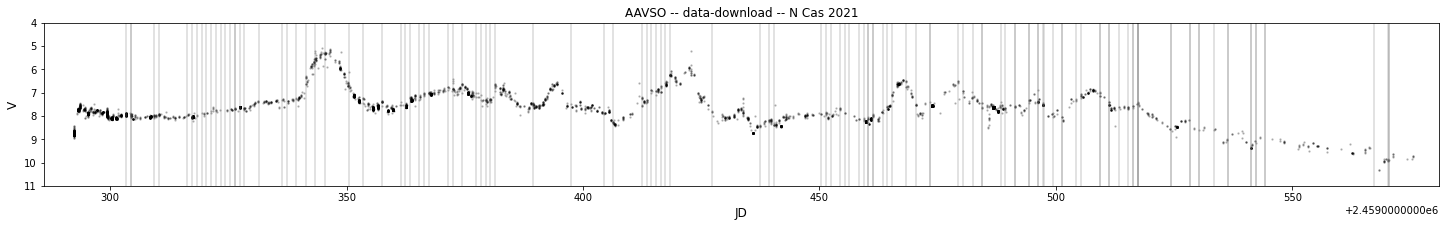

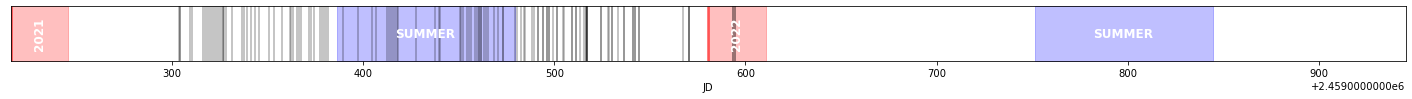

Magnitude: (5.082, 10.336) Julyan Day: (2459290.65, 2459575.87847) Period: 285.22846999997273


In [5]:
plt.figure(figsize=(25,3))
c.V
c.JulianDay = a.observations()['JD']
c.plot()
plt.show()

plt.figure(figsize=(25,1))
a.start = 2021
a.stop = 2023
a.plot()

print('Magnitude:',c.magnitudeMinMax,'Julyan Day:',c.JDMinMax,'Period:',c.period)

>**_Note_ :** Les fichiers fits des images sont [ici](https://drive.google.com/drive/folders/1rvOLhaCoAs7-KvF8A8l54DUlIH7qFNtc?usp=sharing).

- Configuration de Ciboulette avec les coordonées AAVSO, du Canon 200mm F2.8 comme optique et de la caméra ZWO ASI178MM. Projection de l'emplacement de Messier 52 et carte de la région. La position de la lune est à la date du jour de la création du document.

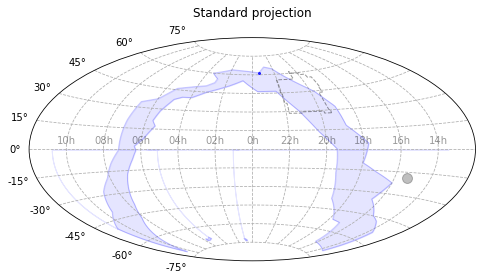

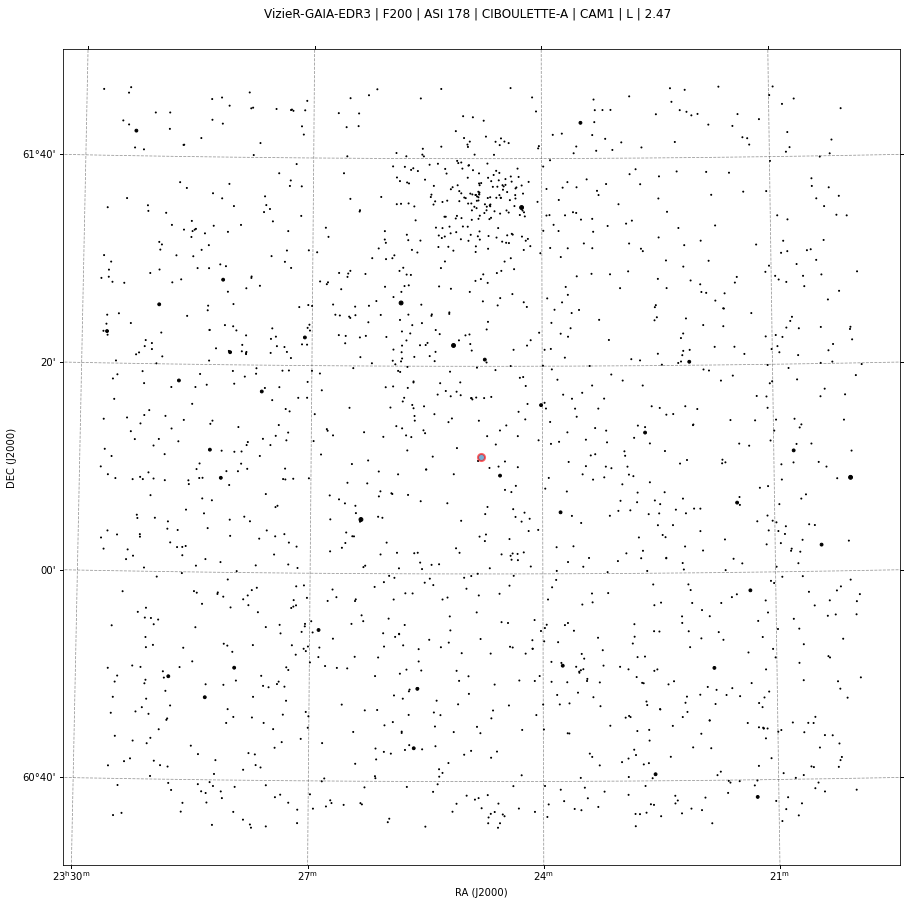

In [8]:
cbl.positionsbyaavso = 'v1405 cas'
cbl.canon200_2_8
cbl.asi178
cbl.projections
cbl.starsmap

>**_Note_ :** Pour la configuration du module ciboulette c'est [ici](https://github.com/dtouzan/ciboulette/blob/main/notebook/exemple-base.ipynb).

- Edition de certaines images.

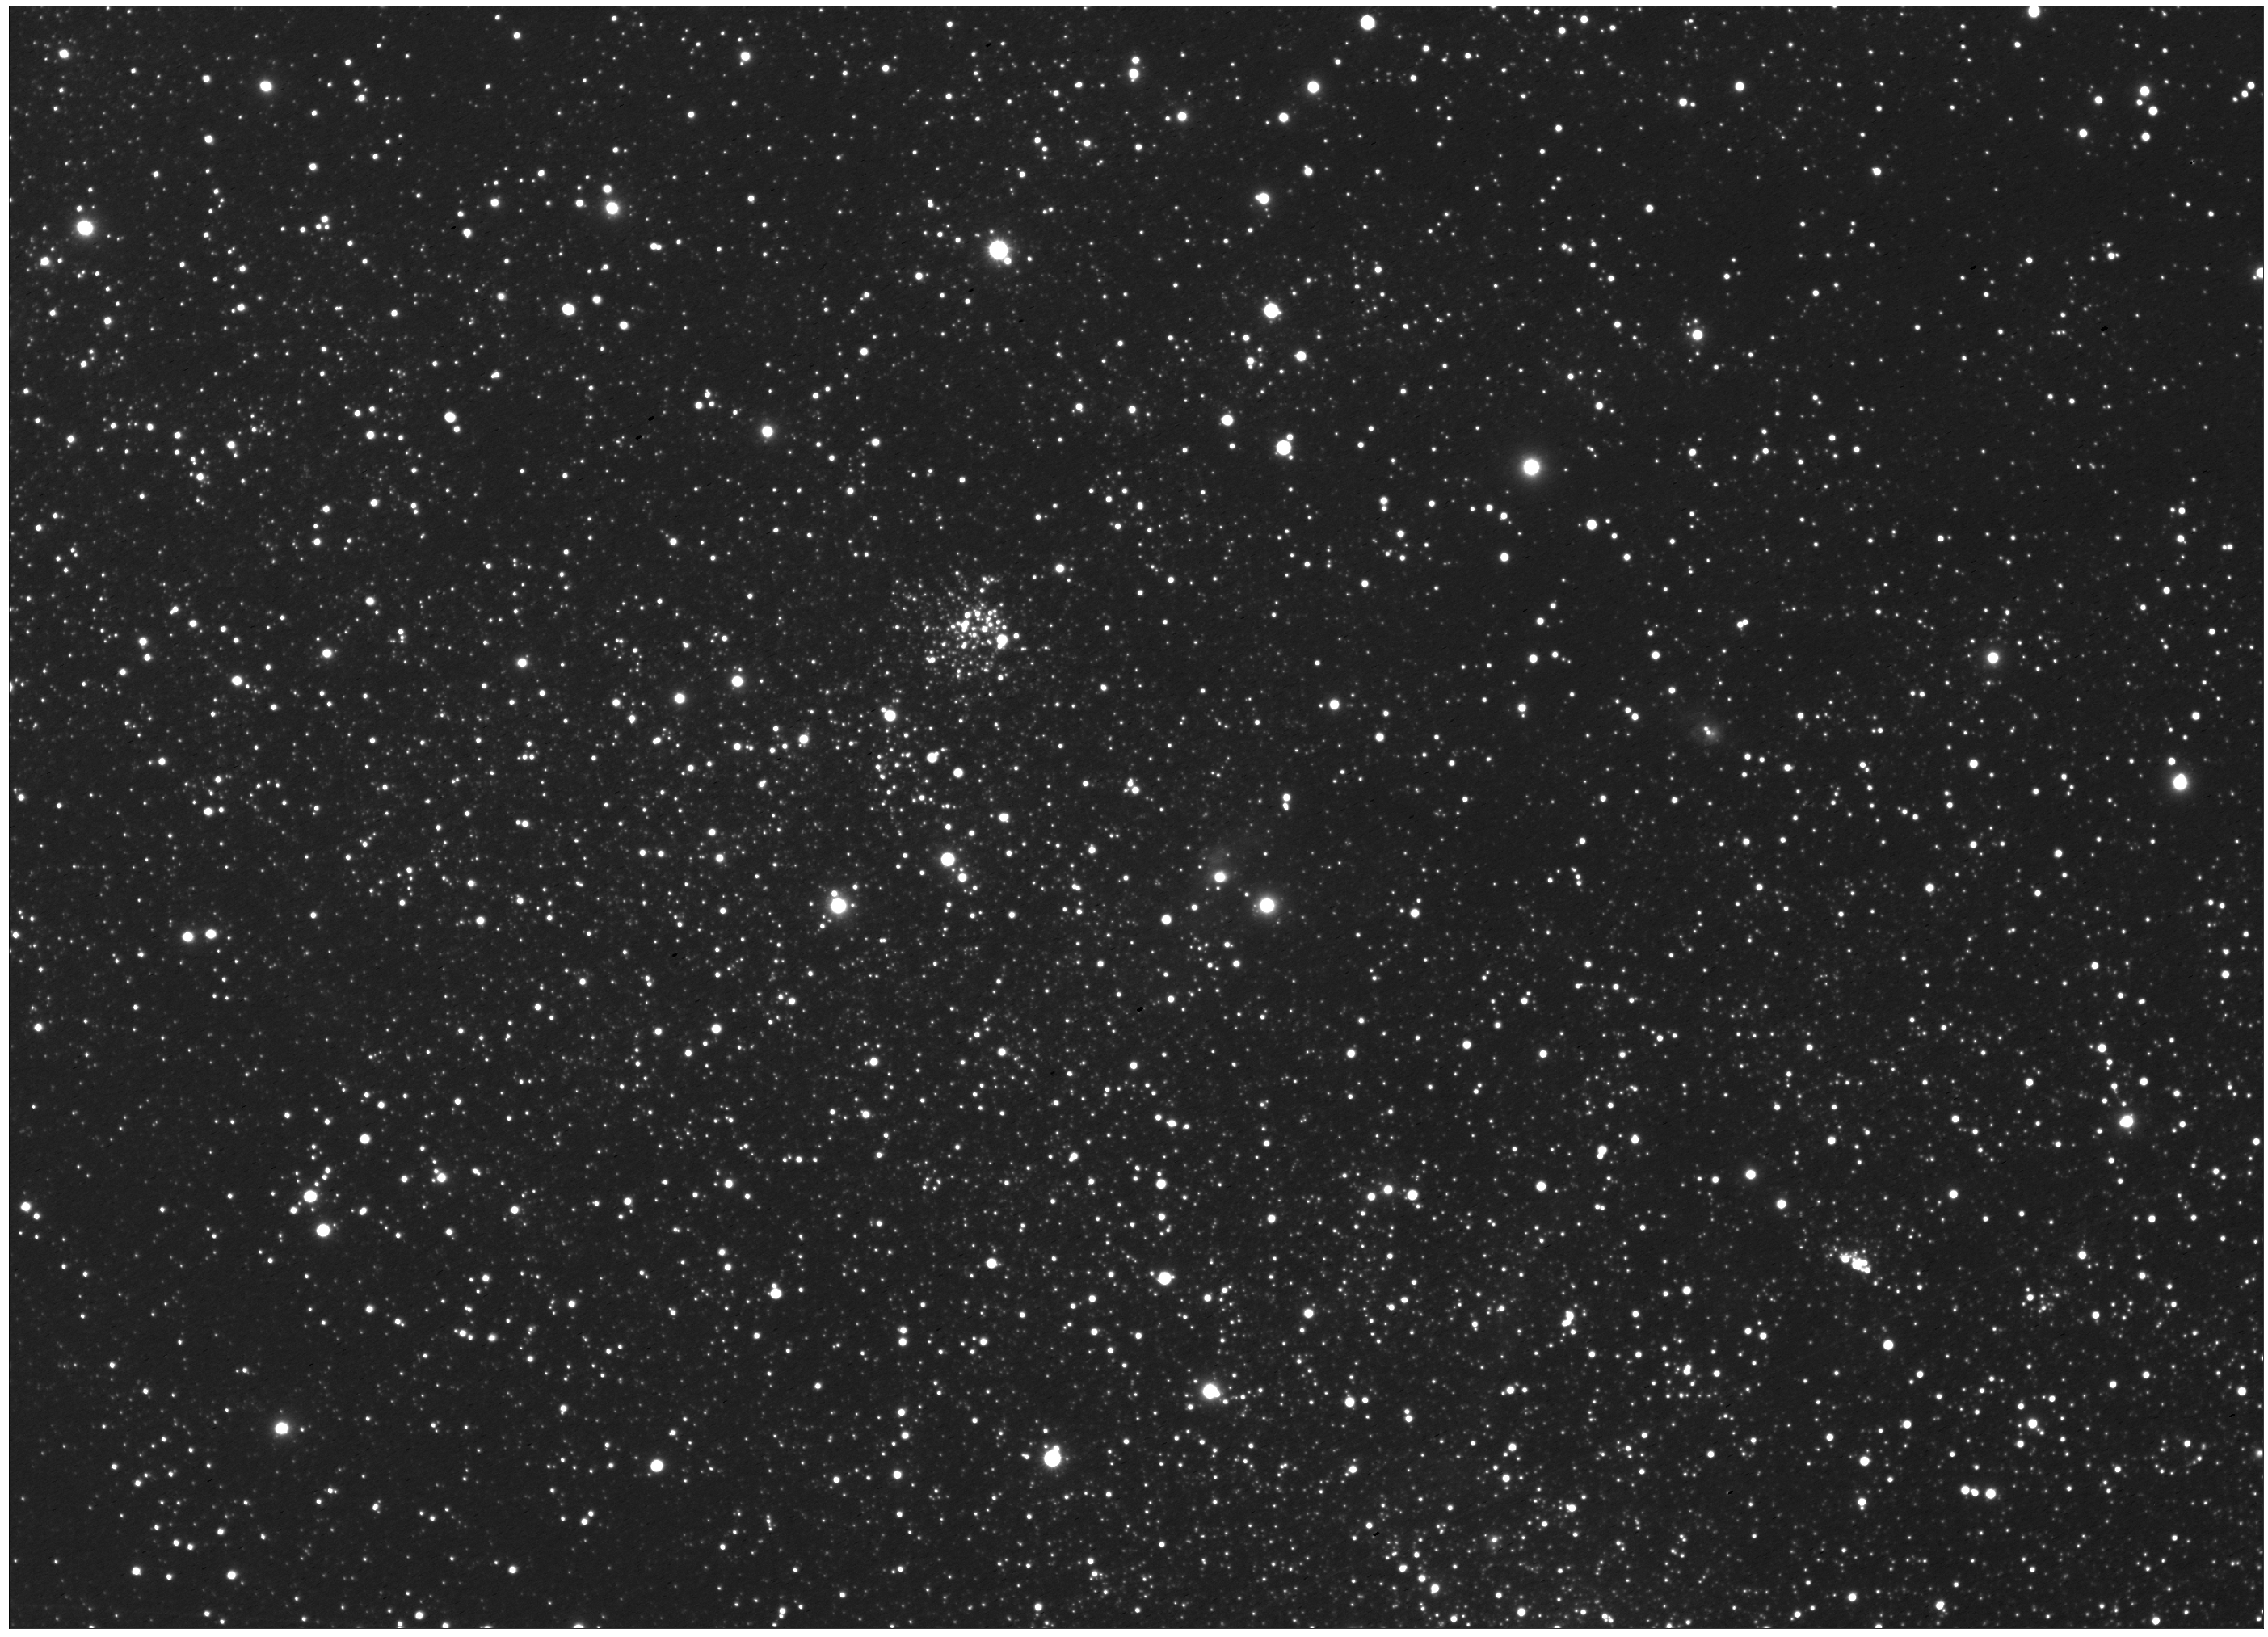

In [137]:
datafits = 'dataset/archives/v1405cas-20210915-1936-49x30s-f85.fits'
fig, ax = plt.subplots(figsize=(50, 50))
image_data = fits.getdata(datafits, ext=0)
mean = np.mean(image_data)
ax.imshow(image_data[100:1900,200:2700], cmap='gray', vmin = mean - 1000, vmax = mean + 5000, origin = 'lower')
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

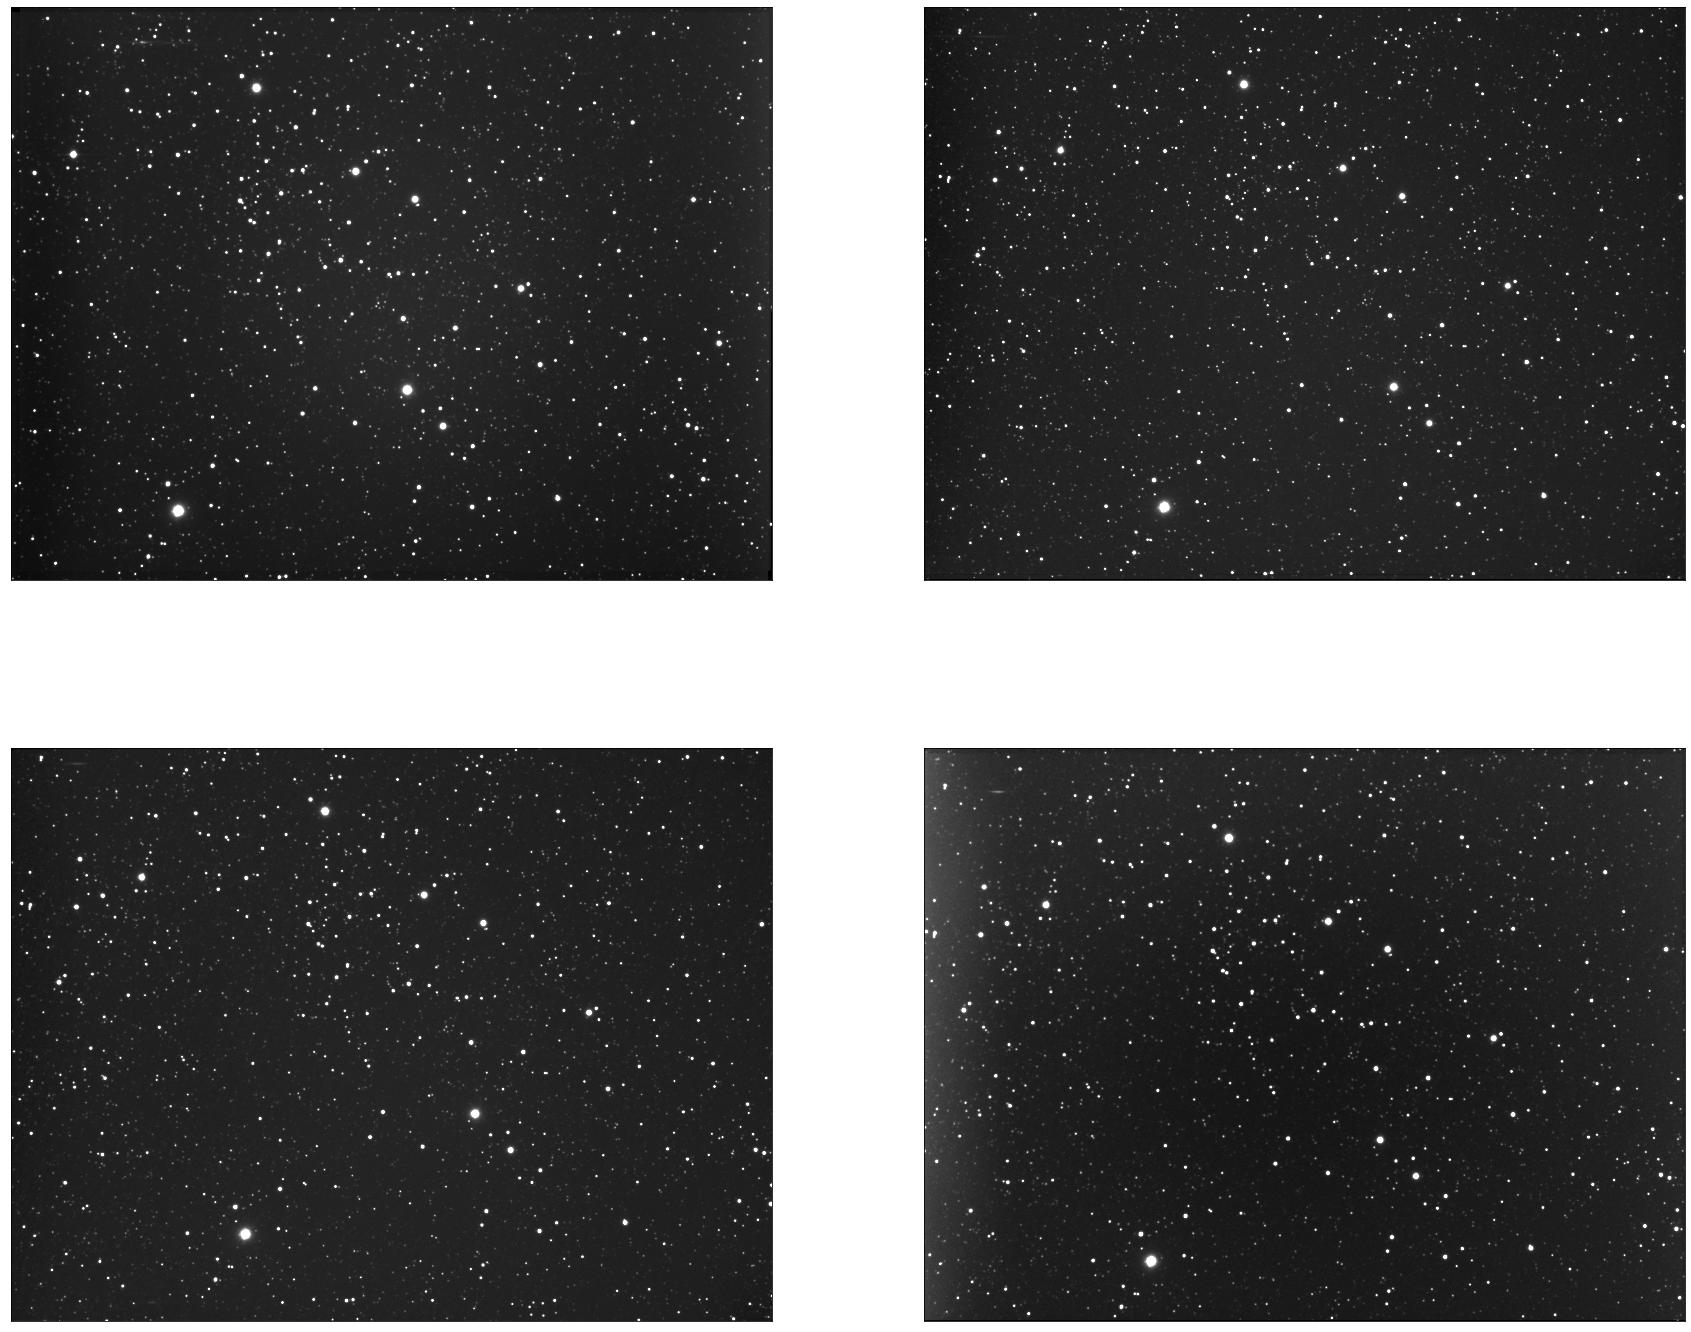

In [165]:
datafits = ('dataset/archives/v1405cas-20211003-1948-1x60s-f750.fits',
            'dataset/archives/v1405cas-20211013-1945-8x60s-f750.fits',
            'dataset/archives/v1405cas-20211029-1934-18x60s-f750.fits',
            'dataset/archives/v1405cas-20211125-1938-7x60s-f750.fits')
fig, axs = plt.subplots(2, 2, figsize=(30, 25))
nrow = 0
ncol = 0
for files in datafits:
    image_data = fits.getdata(files, ext=0)
    mean = np.mean(image_data)
    axs[ncol, nrow].imshow(image_data, cmap='gray', vmin = mean - 150, vmax = mean + 800, origin = 'lower')
    axs[ncol, nrow].axes.xaxis.set_visible(False)
    axs[ncol, nrow].axes.yaxis.set_visible(False)
    nrow += 1
    if nrow == 2:
        ncol += 1
        nrow = 0

- Lecture des profiles créés et des références ISIS 6.1.1 et création de la bibliothèque.

In [2]:
dataset = ('dataset/dbspectre/Pn_v1405cas-20211122.fits',
           'dataset/dbspectre/Pn_v1405cas-20211123.fits',
           'dataset/dbspectre/Pn_v1405cas-20211221.fits',
           'dataset/dbspectre/Pn_v1405cas-20220113.fits')

table_sa200 = []
for file in dataset:
    table_sa200.append(sa200.SA200(file))

B2IV_P = sa200.SA200('dataset/dbspectre/ref-B2IV-3500-8000.fits')
B2IV = sa200.SA200('dataset/dbspectre/ref-B2IV.fits')

>**Note:** Les fichiers sont [ici.](https://drive.google.com/drive/folders/1vB4VsLEAP8Jh2qYspy3vRUTOjJ1kNKfP?usp=sharing)

- Edition des profiles.

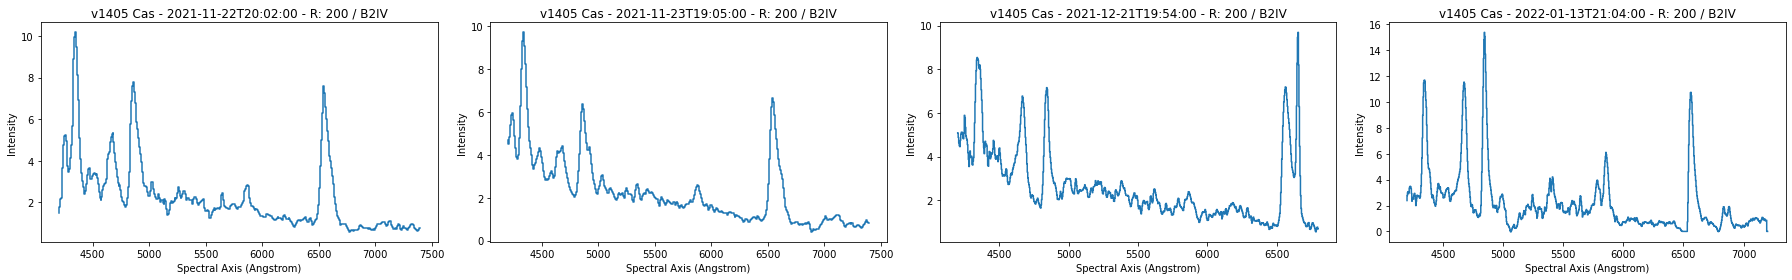

In [3]:
nrows = 1
ncols = 4
fig, axs = plt.subplots(nrows, ncols, figsize=(25, 4))

nrow = 0
ncol = 0
for S in table_sa200:
    axs[ncol].set_title(S.title)
    axs[ncol].step(S.s1d.spectral_axis, S.s1d.flux)
    axs[ncol].set_xlabel('Spectral Axis ({})'.format(S.s1d.spectral_axis.unit)) 
    axs[ncol].set_ylabel('Intensity'.format(S.s1d.flux.unit))
    ncol +=1
    
fig.tight_layout()
plt.show()

- Comparaison des spectres de **v1405 Cas**. 

Sans le traitement de la PLU l'image est bien bruitée, de plus avec ce mode pleine ouverture les étoiles sont dans les spectres. Cela n'empèche pas de faire plusieurs spectres basse résolution même en tournant le SA200 ou d'avoir deux ou trois réseaux ayant plusieurs oriantation dans un porte filtre et de faire une médianne des images(applications non fait pour ce cas).

Expliquer pourquoi B2IV...

In [4]:
#Serie de balmer
Ha = 6562.10
Hb = 4861.32
Hg = 4340.46
Hd = 4101.73

Mg = 5714

# Doublet du sodium
NaID1 = 5889.950
NaID2 = 5895.924 

SiIIa = 6347.1
SiIIb = 6371.4

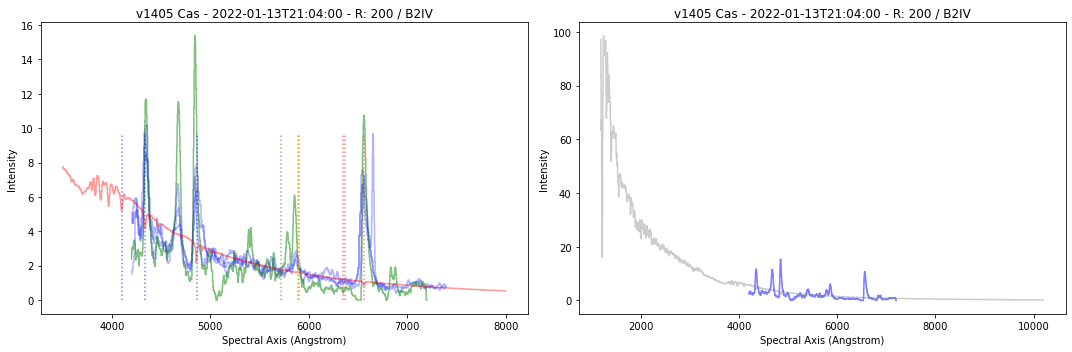

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))  
_alpha = 0.3
_color = 'blue'
for S in table_sa200:
    if S == table_sa200[3]:
        _alpha = 0.5
        _color = 'green'
    axs[0].set_title(S.title)
    axs[0].step(S.s1d.spectral_axis, S.s1d.flux, color = _color, alpha = _alpha)
axs[0].step(B2IV_P.s1d.spectral_axis, B2IV_P.s1d.flux, color = 'red', alpha = 0.4)
axs[0].vlines(Ha, 0,max(table_sa200[1].s1d.flux), linestyles = 'dotted', colors = 'red', alpha = 0.5)
axs[0].vlines(Hb, 0,max(table_sa200[1].s1d.flux), linestyles = 'dotted', colors = 'blue', alpha = 0.5)
axs[0].vlines(Hg, 0,max(table_sa200[1].s1d.flux), linestyles = 'dotted', colors = 'blue', alpha = 0.5)
axs[0].vlines(Hd, 0,max(table_sa200[1].s1d.flux), linestyles = 'dotted', colors = 'blue', alpha = 0.5)
axs[0].vlines(Mg, 0,max(table_sa200[1].s1d.flux), linestyles = 'dotted', colors = 'green', alpha = 0.5)
axs[0].vlines(NaID1, 0,max(table_sa200[1].s1d.flux), linestyles = 'dotted', colors = 'orange', alpha = 1)
axs[0].vlines(NaID2, 0,max(table_sa200[1].s1d.flux), linestyles = 'dotted', colors = 'orange', alpha = 1)
axs[0].vlines(SiIIa, 0,max(table_sa200[1].s1d.flux), linestyles = 'dotted', colors = 'red', alpha = 0.5)
axs[0].vlines(SiIIb, 0,max(table_sa200[1].s1d.flux), linestyles = 'dotted', colors = 'red', alpha = 0.5)
axs[0].set_title(table_sa200[3].title)  
axs[0].set_xlabel('Spectral Axis ({})'.format(table_sa200[1].s1d.spectral_axis.unit)) 
axs[0].set_ylabel('Intensity'.format(table_sa200[1].s1d.flux.unit))

axs[1].set_title(table_sa200[3].title)
axs[1].step(S.s1d.spectral_axis, S.s1d.flux, color = 'blue', alpha = 0.5)
axs[1].step(B2IV.s1d.spectral_axis, B2IV.s1d.flux, color = 'grey', alpha = 0.4)
axs[1].set_xlabel('Spectral Axis ({})'.format(table_sa200[1].s1d.spectral_axis.unit)) 
axs[1].set_ylabel('Intensity'.format(table_sa200[1].s1d.flux.unit))

fig.tight_layout()
plt.show()

>**_Fig 6.0._** Certaines raies ne sont que des étoiles à l'ordre 0. A la fin du spectre la raie après H alpha est l'étoile TYC 4280-759-1. Le dernier spectre est en vert.

## Instruments et applications
---
La partie spectrographe est faite par l'instrument de droite. Vers septembre 2021 les images ont été réalisées par la CCD Atik 383L+ et le télescope Intes M603 le suivi était assuré par la caméra ZWO ASI 120Mini et l'Atik OAG. Début descembre l'objectif Samyang 85 mm F1.4 a été remplacé par un objectif Canon 200 mm F2.8. A voir

![preview](https://github.com/dtouzan/preview/blob/main/spectro.png?raw=true)


## Remerciements
---
Remerciements aux auteurs des documentations des logiciels et des sites internet pour faciliter l'utilisations de ceux-ci, ainsi qu'aux nombreuses bases de données publique CDS portal et AAVSO.

## Références
---
<a id='ref1'></a>
[1]. Isis 6.1, http://www.astrosurf.com/buil/isis-software.html<br>
<a id='ref2'></a>
[2]. Siril 1.0.0-rc2, https://siril.org/fr/<br>
<a id='ref3'></a>
[3]. Aladin Sky Atlas 11.0, https://aladin.u-strasbg.fr/<br>
<a id='ref4'></a>
[4]. RSpec 2.0, https://www.rspec-astro.com/<br>
<a id='ref5'></a>
[5]. AAVSO, https://www.aavso.org/databases<br>
<a id='ref6'></a>
[6]. CDS Portal, http://cdsportal.u-strasbg.fr/<br>
<a id='ref7'></a>
[7]. Dataset, https://drive.google.com/drive/folders/1rvOLhaCoAs7-KvF8A8l54DUlIH7qFNtc?usp=sharing

![preview](https://github.com/dtouzan/preview/blob/main/logo.png?raw=true)